###  TITANIC
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Practice Skills
Binary classification and Python

https://www.kaggle.com/c/titanic

__Partie 1:__ Description des données  
__Partie 2:__ Completion du dataset (Age, Name, Cabin)  
__partie 3:__ tranformation du dataset pour les algo  
__partie 4:__ Algo  
__partie 5:__ Présentation des résultats   

# imports

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 3300)
pd.set_option('display.max_rows', 100)


from IPython.display import Image
#pd.set_option('display.max_colwidth', 100)
#pd.set_option('display.width', 200)
#pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows', 40)


In [107]:
filename = "train.csv"
filename_2 = "test.csv"
#path = "/Users/kaiim/Downloads/titanic/"
## path with docker
path = "/home/jovyan/work/"
import_text = pd.read_csv(path+filename)
test_import = pd.read_csv(path+filename_2)
test = pd.DataFrame(test_import)
train = pd.DataFrame(import_text)
copy_test = test
copy_train = train

# 1 - Présentation des données

In [108]:
# Train commence a Passengerid = 1:891
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
# Test commence a Passengerid = 892
test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## 1-1 - Descriptions des donées 
>__PassengerId__ : numéro du passager  __(int)__  
__Survived__ : survécu = 1, Non survécu = 0  __(int)__  
__Pclass__ : Catégorie du billet (1er, 2eme ou 3eme class) __(int)__  
__Name__ : Nom de la personne __(string)__   
__Sex__ : Homme ou Femme __(string)__  
__SibSp__ : Si il y a des frère, soeur, demi-frère, demi-soeur, époux, épouse. (les maîtresses et les fiancées ont été ignorées) __(int)__  
__Parch__ : Parent = mère, père. Enfant = fille, fils, belle-fille, beau-fils. Certains enfants voyageaient uniquement avec une nourrice, donc parch = 0 pour eux.  __(int)__  
__Ticket__ : Numéro du ticket __(string)__  
__Fare__ : Prix du billet  __(int)__  
__Cabin__ : Numéro de cabine  __(string)__  
__Embarked__ : Point d'entrée lors de l'embarquement  __(string)__

Dans le dataframe, il y a 890 lignes pour 12 collonnes.

In [110]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [111]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [112]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nous pouvons voir que dans la colonne "age" il y a des valeurs nulle

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [115]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Nous allons associer les train et test pour completer les donnees

In [117]:
train = train.append(test, sort=False)

In [118]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Partie 2: Completion du dataset

Le but étant de savoir si on :
- remplace les données manquante (moyenne, médiane, etc etc)
- Création d'un algo qui va segmenter les parties atribuer les valeurs (attention à na pas induire le dataset en erreur)

Ce shemas indique la maiere dont nous pouvons essayer de traiter les donnes a analyser. 
dans notre cas nous pouvons essayer les multiples imputations en essaayant de segmenter au mieux la donne pour la remplacer par des medianne de sous groupe. Nous avons aussi la regression logistic (par exemple la methode KNN pour affiner au mieux les resultats).

In [119]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*_RA3mCS30Pr0vUxbp25Yxw.png")

### 2-1 Name
Nous allons normaliser tout d'abord la colonne des noms pour harmoniser les titres mr, mrs etc etc ..

In [120]:
train["Title"] = ""

s = []
for dataset in train["Name"]:
    s.append(pd.Series(dataset).str.extract(r' ([A-Za-z]+)\.', expand=False))
train["Title"] = s
train["Title"] = train["Title"].map(lambda name:name.to_string().replace("0   ", "").split(' ', 2)[1])

In [121]:
train["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Sir           1
Dona          1
Mme           1
Capt          1
Don           1
Lady          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [122]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Miss
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,Mrs
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,Miss
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [123]:
Title_Dict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [124]:
train['Title'] = train.Title.map(Title_Dict)
train["Title"].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

D'autres test auraient pu etre faits pour trouver les incoherence plus subtils. Par exemple regarder qu'il y a bien des ecarts d'age pour des meme nom de familles (). Ou des erreurs d'orthographes (Utiliser pour cela l'algo de leventsein pour calculer les distances). Regarder les liens de familles et verifier que les personnes etaient bien presentes (faire une fonction de trie par famille puis par no; avec un str compare, ou isoler les nom de famille)
j'ai la flemme de le faire la :)

### 2-2 Embarked

In [125]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


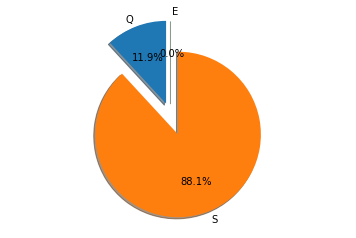

In [126]:
class_one = len(train[train["Embarked"] == "Q"])
class_two = len(train[train["Embarked"] == "S"])
class_three = len(train[train["Embarked"] == "E"])

name = ['Q', 'S', "E"]
data = [class_one, class_two, class_three]
explode=(0.2, 0.20, 0.20)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

je decide donc de dire que les 2 embarkement appartiennent a l'embarkement S

In [127]:
train["Embarked"].fillna('S',inplace=True)

### 2-3 Fare

In [128]:
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


essayons de regrouper par class et titre et ticket

In [135]:
x = train[(train["Age"] > 60 ) & (train["Pclass"] == 3)]
x = x["Fare"].median()
x

7.75

In [136]:
train["Fare"] = train["Fare"].fillna(x)

In [138]:
train[(train["Name"] == "Storey, Mr. Thomas")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.75,NaN,S,Mr


### 2-3 Ages

Nous allons voir la repartition entre les femmes et hommes pour remplacer potentiellement les valeurs nulles 
d'Age des femmes par la médianne des femme et pareil pour les hommes

In [139]:
empty_age = train[train["Age"].isnull()]
empty_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr


#### Répartition du nombre de femmes et hommes dans les données manquantes

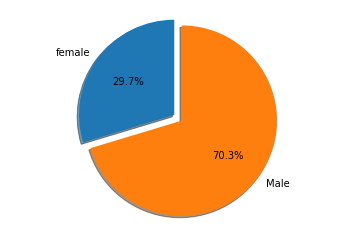

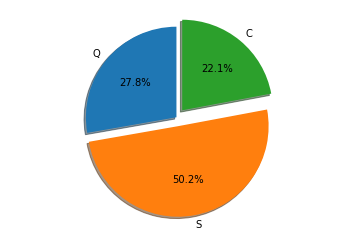

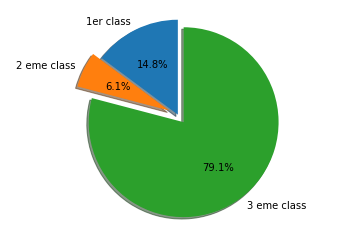

In [83]:
len_femme = len(empty_age[empty_age["Sex"] == "female"])
len_homme = len(empty_age[empty_age["Sex"] == "male"])
name = ['female', 'Male']
data = [len_femme, len_homme]
explode=(0, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

Q_embarked = len(empty_age[empty_age["Embarked"] == "Q"])
s_embarked = len(empty_age[empty_age["Embarked"] == "S"])
C_embarked = len(empty_age[empty_age["Embarked"] == "C"])

name = ['Q', 'S', 'C']
data = [Q_embarked, s_embarked, C_embarked]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

class_one = len(empty_age[empty_age["Pclass"] == 1])
class_two = len(empty_age[empty_age["Pclass"] == 2])
class_three = len(empty_age[empty_age["Pclass"] == 3])

name = ['1er class', '2 eme class', "3 eme class"]
data = [class_one, class_two, class_three]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

70% Des données manquantes proviennent majoritairement d'hommmes. Nous allons étudier la distribution des données des hommes et femmes.

les camember en cercle n'étant pas égale en valeurs. Nous allons utiliser la médiane pour "Pclass", "Sex", "Embarked" mais aussi "Title", cela, Afin d'affiner les résulat de manire plus precise.  
Nous allons calculer la medianne en prennant ses 4 colonnes pour ensuite les attribuer aux valeurs manquantes.

In [84]:
copy = train
cop = copy.iloc[0:len(copy)].groupby(["Sex","Pclass","Embarked", "Title"]).median()
cop = cop.reset_index()[['Sex', 'Pclass', 'Title', 'Embarked','Age']]
print(cop)

       Sex  Pclass    Title Embarked   Age
0   female       1     Miss        C  31.5
1   female       1      Mrs        C  45.0
2   female       1  Royalty        C  48.0
3   female       1     Miss        Q  33.0
4   female       1      Mrs        Q  37.0
5   female       1     Miss        S  27.0
6   female       1      Mrs        S  45.0
7   female       1  Officer        S  49.0
8   female       1  Royalty        S  33.0
9   female       2     Miss        C  17.0
10  female       2      Mrs        C  23.5
11  female       2     Miss        Q  30.0
12  female       2     Miss        S  20.0
13  female       2      Mrs        S  32.0
14  female       3     Miss        C   9.0
15  female       3      Mrs        C  24.0
16  female       3     Miss        Q  22.0
17  female       3      Mrs        Q  35.5
18  female       3     Miss        S  20.0
19  female       3      Mrs        S  31.0
20    male       1   Master        C   9.5
21    male       1       Mr        C  39.0
22    male 

In [85]:
def get_info(col):
    cond = (
            (cop["Sex"] == col["Sex"]) & 
            (cop["Pclass"] == col["Pclass"]) & 
            (cop["Embarked"] == col["Embarked"]) & 
            (cop["Title"] == col["Title"])
           )
    return cop[cond]["Age"].values[0]


def transform(col):
    stock = get_info(col) 
    if np.isnan(col["Age"]):
        #print("Age", col["Age"], "stock", stock, "name",col["Name"])
        return stock
    else:
        return col["Age"]

train["Age"] = train.apply(lambda col: transform(col), axis=1)    
train.head(10)

IndexError: ('index 0 is out of bounds for axis 0 with size 0', 'occurred at index 414')

### 2-4 Cabin

In [77]:
empty_cabin = train[train["Cabin"].isnull()]

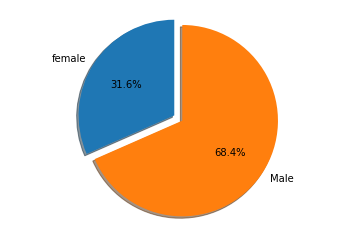

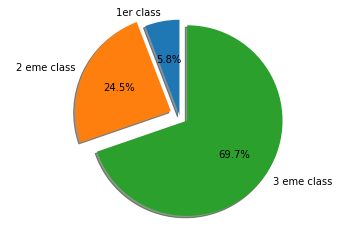

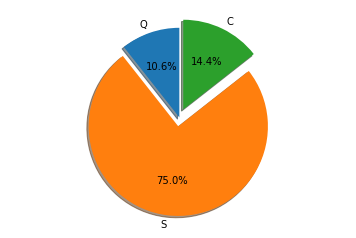

In [78]:
len_femme = len(empty_cabin[empty_cabin["Sex"] == "female"])
len_homme = len(empty_cabin[empty_cabin["Sex"] == "male"])
name = ['female', 'Male']
data = [len_femme, len_homme]
explode=(0, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

class_one = len(empty_cabin[empty_cabin["Pclass"] == 1])
class_two = len(empty_cabin[empty_cabin["Pclass"] == 2])
class_three = len(empty_cabin[empty_cabin["Pclass"] == 3])

name = ['1er class', '2 eme class', "3 eme class"]
data = [class_one, class_two, class_three]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

Q_embarked = len(empty_cabin[empty_cabin["Embarked"] == "Q"])
s_embarked = len(empty_cabin[empty_cabin["Embarked"] == "S"])
C_embarked = len(empty_cabin[empty_cabin["Embarked"] == "C"])

name = ['Q', 'S', 'C']
data = [Q_embarked, s_embarked, C_embarked]
explode=(0, 0.10, 0.10)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

In [79]:
value_Pclass = 3
value_sex = "male"
value_embarked = "S"

cond = ((train["Sex"] == value_sex) & (train["Pclass"] == value_Pclass) & (train["Embarked"] == value_embarked))

train[cond]["Cabin"].value_counts()

F G73    2
F G63    1
E10      1
E121     1
Name: Cabin, dtype: int64

Il est assez complique d'essayer de completer ses donnes au vu du peu de donne present. je vais donc remplacer les donnes manquantes par des "U" = unknow.

In [80]:
train["Cabin"].fillna('U',inplace=True)

In [81]:
ld = []

def get_error(string):
    if '(' in string:
        return 1
    else:
        return 0

for data in train["Name"]:
    mrs = ""
    mrs_1 = ""
    mrs_2 = ""
    name, rest = data.split(",", 1)
    title, mrs = rest.split(".", 1)
    if get_error(mrs):
        mrs_1, mrs_2 = mrs.strip().split("(", 1)
        mrs_1 = mrs_1.strip(" ")
        mrs_2 = mrs_2.replace(")", "")
        ld.append([name, title, mrs_1, mrs_2])
    else:
        ld.append([name, title, mrs.strip(" ")])

ld[0:3]

[['Braund', ' Mr', 'Owen Harris'],
 ['Cumings', ' Mrs', 'John Bradley', 'Florence Briggs Thayer'],
 ['Heikkinen', ' Miss', 'Laina']]

Nous pouvons voir qu'il n'y a pas d'erreur et que les nom entre parentheses ont ete donne qu'au femme marie

In [25]:
for data in ld:
    if (data[1] == "Miss" and len(data > 1)):
        print(data)
    if (data[1] == "Mr" and len(data > 1)):
        print(data)
    if (data[1] == "Officer" and len(data > 1)):
        print(data)

In [82]:
train["Cabin"].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [83]:
# Recupere la colonne 
# res = res[0]

def transform_cabin(df):
    df["Cabin"] = df["Cabin"].map(lambda data: data[0])
    return df

sss = transform_cabin(train)
sss["Cabin"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [84]:
# verification
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### 3 - 1 Transformation du dataset pour les algos

In [85]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr


les col PassengerId, Name, Ticket, Cabin

### En fonction de l'age

In [86]:
train['Child'] = 0
train.loc[train['Age'] < 15, 'Child'] = 1

In [87]:
train['Elderly'] = 0
train.loc[train['Age'] > 62, 'Elderly'] = 1

In [88]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Elderly
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,0,0


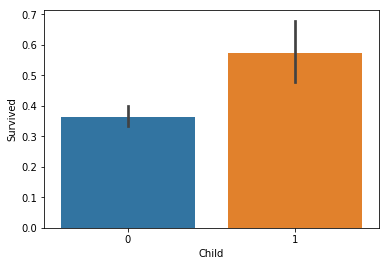

In [89]:
sns.barplot(x="Child", y="Survived", data=train)

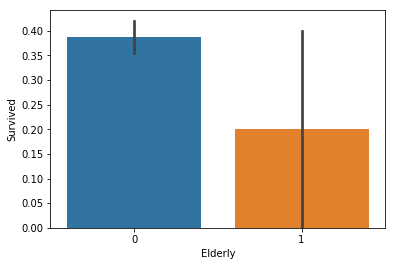

In [90]:
sns.barplot(x="Elderly", y="Survived", data=train)

Nous pouvons voir que les personnes ages avaient moin de chances de survivre. les Enfants eux oui. 

### Transformation du dataset pour la preparations aux algo

il y a 2 manieres de le faire

__1. Integer Encoding__  
Dans un premier temps, chaque valeur de catégorie unique se voit attribuer une valeur entière.

Par exemple, “ rouge ” est 1, “ vert ” est 2 et “ bleu ” est 3.

Ceci est appelé un codage d'étiquette ou un codage entier et est facilement réversible.

Pour certaines variables, cela peut être suffisant.

Les valeurs entières ont une relation naturelle ordonnée entre elles et des algorithmes d'apprentissage automatique peuvent être en mesure de comprendre et d'exploiter cette relation.

Par exemple, des variables ordinales telles que l'exemple «lieu» ci-dessus seraient un bon exemple dans lequel un codage d'étiquette serait suffisant.  

__2. One-Hot Encoding__  
Pour les variables catégorielles où aucune relation ordinale de ce type n'existe, le codage entier ne suffit pas.

En fait, utiliser cet encodage et permettre au modèle de supposer un ordre naturel entre les catégories peut entraîner des performances médiocres ou des résultats inattendus (prévisions à mi-chemin entre les catégories).

Dans ce cas, un codage one-hot peut être appliqué à la représentation entière. C'est là que la variable codée en entier est supprimée et qu'une nouvelle variable binaire est ajoutée pour chaque valeur entière unique.

Dans l' exemple de variable « couleur », il y a 3 catégories et donc 3 variables binaires sont nécessaires. Une valeur «1» est placée dans la variable binaire pour la couleur et «0» pour les autres couleurs.  
(https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)  

#### Application

In [33]:
#  Definir une fonction qui recoit une colonne et qui va parcourir les values uniques
#  Creation de colonnes par valeur uniques
#  mettre 1 a cette colonne pour toute les valeurs de la colonne

In [181]:
def get_inf(x, valu):
    if x == valu:
        return 1
    else:
        return 0
    
def one_hot(df, value):
    for col in value:
        #print(col)
        unique = df[col].unique()
        for val_unique in unique:
            df[col+str(val_unique)] = 0
        for val_unique in unique:
            name = col+str(val_unique)
            print("Processing pour la valeur", "col", col, val_unique)
            df[name] = df[col].apply(lambda x: get_inf(x, val_unique))

        #print("end")
                                     
value = ["Pclass", "Sex", "Cabin", "Embarked", "Title"]
one_hot(train, value)

Processing pour la valeur col Pclass 3
Processing pour la valeur col Pclass 1
Processing pour la valeur col Pclass 2
Processing pour la valeur col Sex male
Processing pour la valeur col Sex female
Processing pour la valeur col Cabin U
Processing pour la valeur col Cabin C
Processing pour la valeur col Cabin E
Processing pour la valeur col Cabin G
Processing pour la valeur col Cabin D
Processing pour la valeur col Cabin A
Processing pour la valeur col Cabin B
Processing pour la valeur col Cabin F
Processing pour la valeur col Cabin T
Processing pour la valeur col Embarked S
Processing pour la valeur col Embarked C
Processing pour la valeur col Embarked Q
Processing pour la valeur col Title Mr
Processing pour la valeur col Title Mrs
Processing pour la valeur col Title Miss
Processing pour la valeur col Title Master
Processing pour la valeur col Title Royalty
Processing pour la valeur col Title Officer


In [175]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Child,Elderly,Pclass3,Pclass1,Pclass2,Sexmale,Sexfemale,CabinU,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT,EmbarkedS,EmbarkedC,EmbarkedQ,TitleMr,TitleMrs,TitleMiss,TitleMaster,TitleRoyalty,TitleOfficer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


### Partie Algo Random forest

In [183]:
### Random forest  
Image(url= "https://cdn-images-1.medium.com/max/800/1*tEo4x2-2iOZcnhSF13rUTA.png")

#### utilisation du Random forest

In [237]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [267]:
####
s = train.columns
to_drop = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked", "Title", "Survived"]
feature = s.drop(to_drop)

####
#
X=train[feature]  # Features
y=train['Survived']

In [268]:
# Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [269]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [270]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.839552238806


In [247]:
train[feature]

,Survived,Age,SibSp,Parch,Fare,Child,Elderly,Pclass3,Pclass1,Pclass2,Sexmale,Sexfemale,CabinU,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT,EmbarkedS,EmbarkedC,EmbarkedQ,TitleMr,TitleMrs,TitleMiss,TitleMaster,TitleRoyalty,TitleOfficer
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5,0,31.5,0,0,8.4583,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,0,54.0,0,0,51.8625,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,1,27.0,0,2,11.1333,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,1,14.0,1,0,30.0708,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [214]:
train[feature].head(10)

,Survived,Age,SibSp,Parch,Fare,Child,Elderly,Pclass3,Pclass1,Pclass2,Sexmale,Sexfemale,CabinU,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT,EmbarkedS,EmbarkedC,EmbarkedQ,TitleMr,TitleMrs,TitleMiss,TitleMaster,TitleRoyalty,TitleOfficer
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5,0,31.5,0,0,8.4583,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,0,54.0,0,0,51.8625,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,1,27.0,0,2,11.1333,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,1,14.0,1,0,30.0708,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [1]:
#The above submission had an accuracy of only about 75%. For better accuracy, we need:-
#1. Better Machine Learning Algorithms
#2. Generate better features
#3. Combine better ML algorithms
#This time, we will use the Random Forest algorithm.
#Decision trees create a split based on the decision taken on the data.
#We can build very deep decision trees that are specific to our dataset. They will be very accurate for that very dataset. But the downside is that the decision tree overfits our dataset and is not generic enough to work on other datasets.
#This is where the random forest algorithm can help. With random forests, we build hundreds of trees with slightly randomized input data, and slightly randomized split points. Each tree in a random forest gets a random subset of the overall training data. Each split point in each tree is performed on a random subset of the potential columns to split on.
#By averaging the predictions of all the trees, we get a stronger overall prediction and minimize overfitting.
#We will use sklearn's random forest implementation in this case.

In [34]:
#train["Age"].fillna(train.groupby(["Pclass", "Sex", "Embarked"])["Age"].transform("median"), inplace=True)
#train.groupby(["Pclass", "Sex", "Embarked"])["Age"].transform("median")
#verif = data_cpy[(data_cpy["Pclass"] == 3) & (data_cpy["Sex"] == "male" ) & (data_cpy["Embarked"] == "Q")]
#verif.head(5)
#verif = data_cpy[(data_cpy["Pclass"] == 3) & (data_cpy["Embarked"] == "Q")]
#verif.head(5)
### image = wget "https://cdn-images-1.medium.com/max/1400/1*_RA3mCS30Pr0vUxbp25Yxw.png"
### copier cela a 1-1-1 pour reprensenter les choix que nous avons pour selectionner les valeurs manquqntes
#########################################################################################
#########################################################################################
#########################################################################################
### AIDES
#male = empty_age[empty_age["Sex"] == "male"]
#femm = empty_age[empty_age["Sex"] == "femelle"]

#ax = male.plot(kind="bar", y="Age", x="Fare", figsize=(16,10), color="red")
#ax.set_title("Distribution des écarts d'âge entre mari et femme");
#ax = male[male["Age"]].hist(figsize=(16,6), bins=50)
#ax.set_title("Distribution des écarts d'âge entre mari et femme");
#Nuage de points a faire .. 
#empty_age.plot(kind='hexbin', x="age", y="age", gridsize=25, figsize=(7,6))
#ax.set_title("Heatmap - âge entre mari et femmes")
#def bar_chart(feature):
##    survived = train[train['Survived']==1][feature].value_counts()
#    dead = train[train['Survived']==0][feature].value_counts()
#    df = pd.DataFrame([survived,dead])
#    df.index = ['Survived','Dead']
#    df.plot(kind='bar',stacked=True, figsize=(10,5))